In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
sns.set()
%matplotlib inline

In [3]:
df = pd.read_csv('diabetes.csv', header = None)
df.head()

0        1              2              3        4     5  \
0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
1            6      148             72             35        0  33.6   
2            1       85             66             29        0  26.6   
3            8      183             64              0        0  23.3   
4            1       89             66             23       94  28.1   

                          6    7        8  
0  DiabetesPedigreeFunction  Age  Outcome  
1                     0.627   50        1  
2                     0.351   31        0  
3                     0.672   32        1  
4                     0.167   21        0

Performing EDA

In [4]:
df.shape

(769, 9)

We have 55 columns and 581012 rows in the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       769 non-null    object
 1   1       769 non-null    object
 2   2       769 non-null    object
 3   3       769 non-null    object
 4   4       769 non-null    object
 5   5       769 non-null    object
 6   6       769 non-null    object
 7   7       769 non-null    object
 8   8       769 non-null    object
dtypes: object(9)
memory usage: 54.2+ KB


In [6]:
df.describe()

0    1    2    3    4    5      6    7    8
count   769  769  769  769  769  769    769  769  769
unique   18  137   48   52  187  249    518   53    3
top       1  100   70    0    0   32  0.254   22    0
freq    135   17   57  227  374   13      6   72  500

The dataset has all 55 numerical variables. Out of which 54 variables are explanatory variables and 1 variable is the target variable. From the website the cover_type is named target variable

Checking the categories of target variables

In [5]:
#This is our target variable denoted in the website
df[54].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: 54, dtype: int64

Check if there is any null value in the dataset.

In [7]:
null_values = df.isnull().sum()
print(null_values)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64


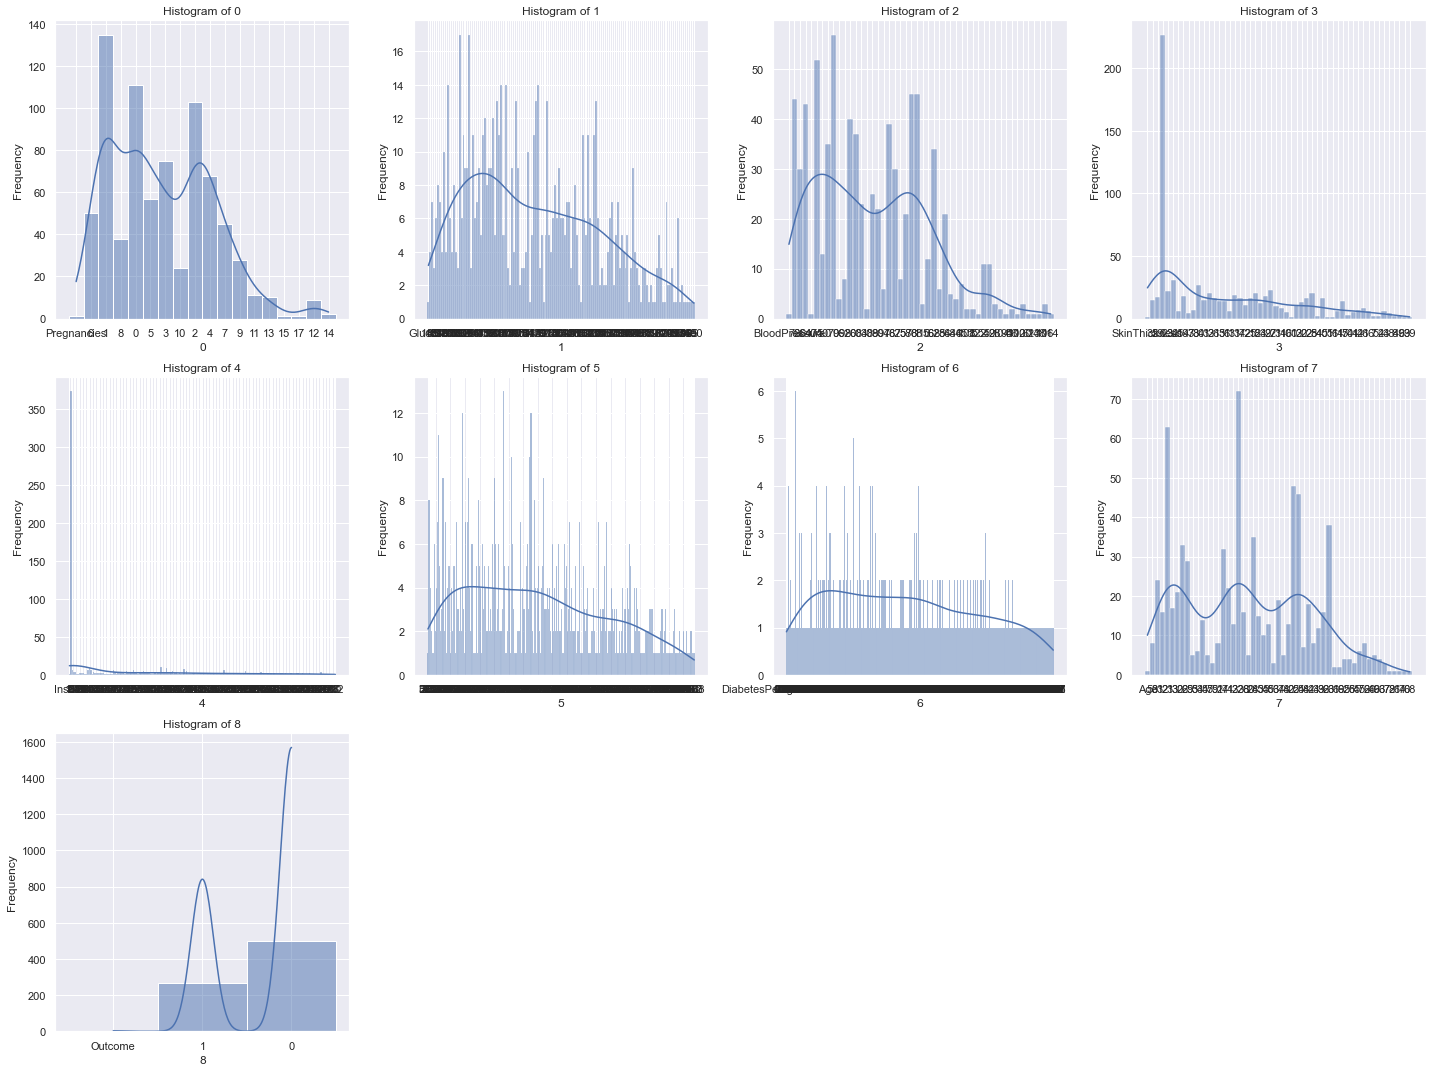

In [9]:
selected_columns = df.iloc[:]  # 0:10 selects the first 10 columns (0 to 9)

# Set the figure size for the subplots
plt.figure(figsize=(20, 15))  # Adjust the size based on the number of columns

# Loop through each selected column and plot a histogram
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 4, i)  # Adjust layout to 3 rows, 4 columns
    sns.histplot(selected_columns[column].dropna(), kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust the spacing between plots
plt.show()

This is the histogram of first 10 columns. Most of the variables are rightly skewed which suggests most data points are concentrated on the left side. Also few column exhibit a bimodal distribution which indicates presence of two distinct groups in the data.

The remaining columns are all binary values representing 0 and 1 

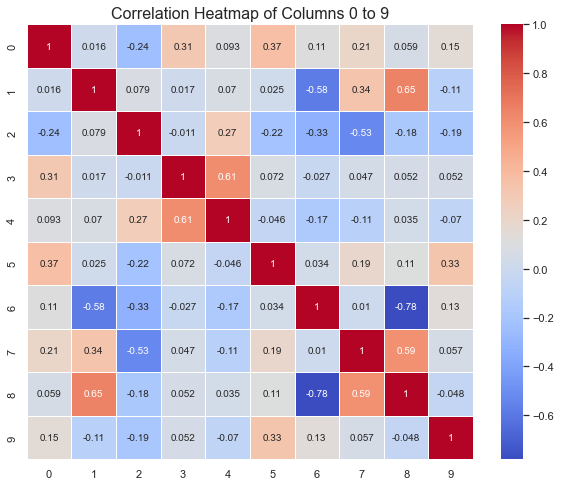

In [27]:
corr_matrix = selected_columns.corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Columns 0 to 9', fontsize=16)
plt.show()

The heatmap above shows the correlation between the numerical variables the more inclined to the red, the more correlated the two variables are.  

## Preparing Data for Model

First we will split the dataset to explanatory variable and target variables

In [28]:
#Column 54 is the target variable cover_type
X = df.drop(54,axis=1)
y = df[54]


We will scale the dataset to bring all the features into a similar range.

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Next we split our dataset into test and train set with ratio to 70 to 30 where 70% of our data is used for training and 30% of our data used for testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state= 101)  

Here we will perform Principal Component Analysis for dimension reduction. It extracts feature from all the column and reduces the size of the variable.

In [10]:
#DO CHECK WITH PCA
from sklearn.decomposition import PCA

# Make an instance of the Model
pca = PCA(.95)
pca.fit(X_train)

PCA(n_components=0.95)

In [11]:
pca.n_components_

43

With 95% variance ratio we will have 43 Principal Components. Next we will use the transform function to impute the pca to train and test data


In [12]:
X_train_pca = pca.transform(X_train)  # Transform training data
X_test_pca = pca.transform(X_test)    # Transform test data

## Using Random Forest of multiclass classification

Here we will be using Random Forest model to predict the values for the multiclass classification.

In [14]:
cf_model = RandomForestClassifier(n_estimators=100, random_state=42) 

In [15]:
cf_model.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

Now we will evaluate the model using Confusion matrix, Classification report and Accuracy metric

In [19]:
y_pred = cf_model.predict(X_test_pca)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print()

print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%") 

Confusion Matrix:
[[59483  3674     5     0    21    14   202]
 [ 2474 82011   211     0   141   128    28]
 [    0   189 10263    54    13   303     0]
 [    0     0   136   644     0    49     0]
 [   51   630    38     0  2138    13     0]
 [    8   263   494    19     4  4461     0]
 [  299    48     0     0     2     0  5793]]

Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.94      0.95     63399
           2       0.94      0.96      0.95     84993
           3       0.92      0.95      0.93     10822
           4       0.90      0.78      0.83       829
           5       0.92      0.74      0.82      2870
           6       0.90      0.85      0.87      5249
           7       0.96      0.94      0.95      6142

    accuracy                           0.95    174304
   macro avg       0.93      0.88      0.90    174304
weighted avg       0.95      0.95      0.95    174304


Accuracy: 94.54%


The overall accuracy of the model is 94.54%, meaning about 94.54% of all predictions made by the model were correct. This is a strong indicator of performance. The model performs great overall, with high accuracy value of 0.94 and solid metrics for most classes. However, there are some slight challenges with Classes 4 and 5, specially with their lower recall and F1-scores.

I didn't perform any hyperparameter tuning and cross validation in this because all the metrics was already great with just the model. There are few imbalances with metric like recall specially in group 4 and 5 with relatively low recall and might need further investigation.